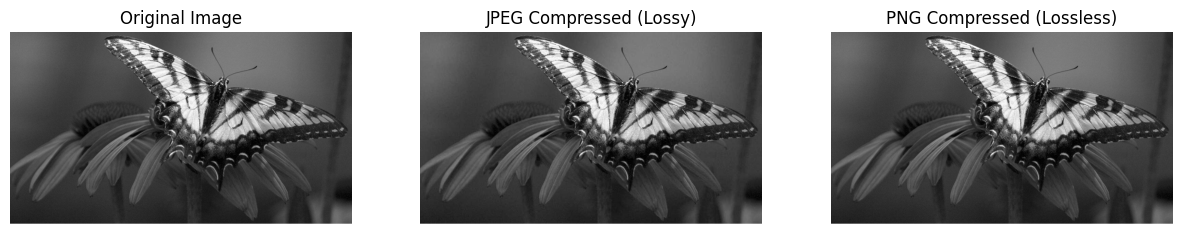

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Butterfly.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imwrite('compressed_jpeg.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, 50])
cv2.imwrite('compressed_png.png', image, [cv2.IMWRITE_PNG_COMPRESSION, 9])


jpeg_compressed = cv2.imread('compressed_jpeg.jpg')
png_compressed = cv2.imread('compressed_png.png')

jpeg_compressed = cv2.cvtColor(jpeg_compressed, cv2.COLOR_BGR2RGB)
png_compressed = cv2.cvtColor(png_compressed, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(jpeg_compressed)
ax[1].set_title("JPEG Compressed (Lossy)")
ax[2].imshow(png_compressed)
ax[2].set_title("PNG Compressed (Lossless)")

for a in ax:
    a.axis("off")

plt.show()


In [4]:
# Task 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns


In [5]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train_cat, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8940 - loss: 0.3424 - val_accuracy: 0.9829 - val_loss: 0.0579
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9851 - loss: 0.0463 - val_accuracy: 0.9880 - val_loss: 0.0405
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9895 - val_loss: 0.0361
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9929 - loss: 0.0222 - val_accuracy: 0.9882 - val_loss: 0.0436
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9913 - val_loss: 0.0350
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy: 0.9918 - val_loss: 0.0327
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9968 - loss: 0.0095 - val_accuracy: 0.9898 - val_loss: 0.0447
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9974 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Accuracy: 0.9918
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



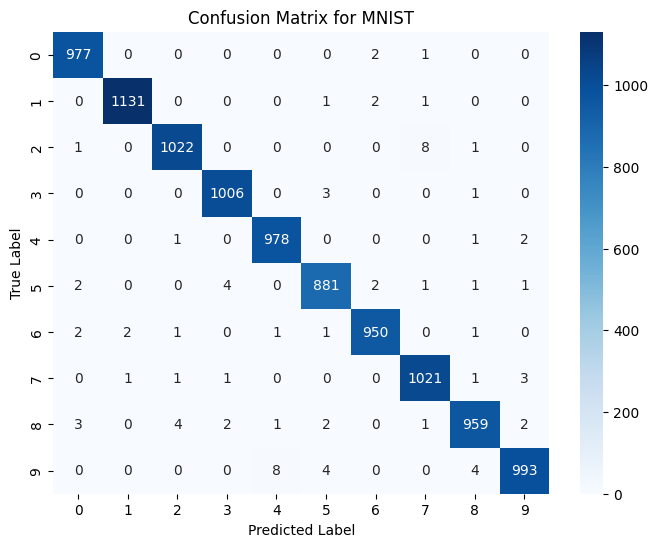

In [8]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MNIST")
plt.show()


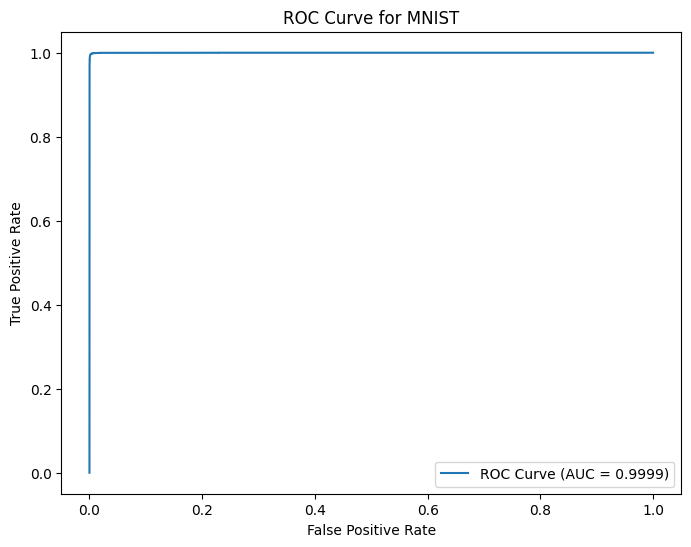

In [9]:

fpr, tpr, _ = roc_curve(y_test_cat.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for MNIST")
plt.legend()
plt.show()


In [10]:

cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [12]:
model_cifar = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [13]:
history_cifar = model_cifar.fit(x_train, y_train_cat, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 49ms/step - accuracy: 0.3816 - loss: 1.6986 - val_accuracy: 0.5654 - val_loss: 1.2191
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.5980 - loss: 1.1395 - val_accuracy: 0.6282 - val_loss: 1.0603
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.6677 - loss: 0.9597 - val_accuracy: 0.6614 - val_loss: 0.9798
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7070 - loss: 0.8394 - val_accuracy: 0.6768 - val_loss: 0.9318
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7396 - loss: 0.7564 - val_accuracy: 0.6863 - val_loss: 0.9340
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7680 - loss: 0.6724 - val_accuracy: 0.7029 - val_loss: 0.8998
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7956 - loss: 0.5952 - val_accuracy: 0.7000 - val_loss: 0.9209
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.8220 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Accuracy: 0.6899
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      1000
           1       0.80      0.82      0.81      1000
           2       0.56      0.58      0.57      1000
           3       0.48      0.58      0.53      1000
           4       0.65      0.61      0.63      1000
           5       0.67      0.47      0.55      1000
           6       0.72      0.79      0.76      1000
           7       0.74      0.79      0.76      1000
           8       0.75      0.81      0.78      1000
           9       0.80      0.74      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



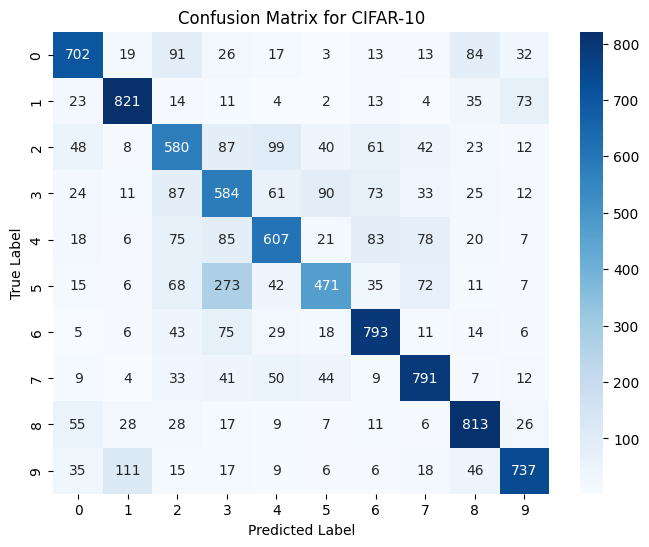

In [14]:
y_pred_probs_cifar = model_cifar.predict(x_test)
y_pred_cifar = np.argmax(y_pred_probs_cifar, axis=1)

accuracy_cifar = np.mean(y_pred_cifar == y_test.flatten())
print(f"Accuracy: {accuracy_cifar:.4f}")

print(classification_report(y_test, y_pred_cifar))
conf_matrix_cifar = confusion_matrix(y_test, y_pred_cifar)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cifar, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()


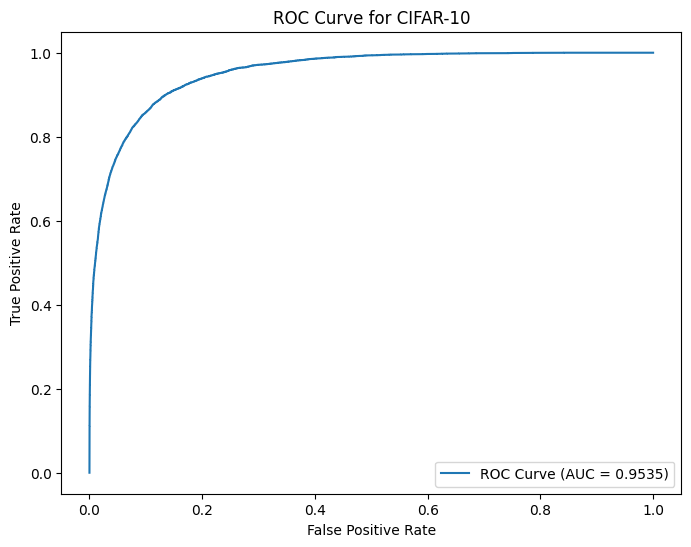

In [15]:
# Compute ROC Curve and AUC for CIFAR-10
fpr_cifar, tpr_cifar, _ = roc_curve(y_test_cat.ravel(), y_pred_probs_cifar.ravel())
roc_auc_cifar = auc(fpr_cifar, tpr_cifar)

plt.figure(figsize=(8,6))
plt.plot(fpr_cifar, tpr_cifar, label=f"ROC Curve (AUC = {roc_auc_cifar:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CIFAR-10")
plt.legend()
plt.show()
